# [데이콘 온라인 스터디] 1주차 - 탐색적 데이터 분석(EDA)

## 불균형한 데이터 분포, 어떻게 처리해야 할까?

지난 6월부터 7월 중순까지 약 4주간에 걸쳐 원자력 상태판단대회 온라인 스터디(2기)가 진행되었습니다. 스터디에서 진행한 내용을 보다 많은 분들과 고민하고자 앞으로 3차례에 걸쳐 코드공유 게시물을 업로드할 예정입니다.

온라인 스터디와 관련한 자료는 아래 링크를 참조해 주세요~!

- 데이콘 온라인 스터디 커리큘럼 [바로가기](https://www.dropbox.com/scl/fi/eaxxhf0pudm9jvckqgf4k/.papert?dl=0&rlkey=yqyrpk9eluqauoi5xjmywmp66)
- 1주차 세션 진행 자료 [바로가기](https://www.dropbox.com/scl/fi/hj22v4f47ythje8flvvm2/1.paper?dl=0&rlkey=0mrorfzb3hnvauscl459gl50z)

첫번째 주제는 <불균형한 데이터 분포, 어떻게 처리해야 할까?>로, 데이터의 분포도를 살펴보고 데이터 분포의 불균형이 초래할 수 있는 문제와 리샘플링 방법에 대해 다뤄보고자 합니다.

### 1. 데이터 로드(데이콘 베이스라인 참고)

In [1]:
import multiprocessing 
from multiprocessing import Pool 
from functools import partial 
from data_loader_v2 import data_loader_v2
import os 
import pandas as pd
import numpy as np
import joblib

In [15]:
test_folder = 'test/'
train_folder = 'train/'
test_list = os.listdir(test_folder)
train_list = os.listdir(train_folder)
train_label_path = 'train_label.csv'
train_label = pd.read_csv(train_label_path, index_col=0)

In [4]:
def data_loader_all_v2(func, files, folder='', train_label=None, event_time=15, nrows=75):   
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)  
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close() 
        pool.join() 
    combined_df = pd.concat(df_list)
    return combined_df

In [5]:
train = data_loader_all_v2(data_loader_v2, train_list, folder=train_folder, train_label=train_label, event_time=15, nrows=75)

In [16]:
test = data_loader_all_v2(data_loader_v2, test_list, folder=test_folder, train_label=None, event_time=15, nrows=75)

In [ ]:
### 2. 데이터 처리

In [6]:
train = train.loc[:,train.nunique()!=1]

In [27]:
list_col = []
list_col = X_train.columns

In [8]:
X_train = train_1.drop(['label'], axis=1)
y_train = train_1['label']

In [31]:
X_train.shape, y_train.shape

((49620, 3428), (49620,))

In [28]:
list_col

Index(['V0000', 'V0001', 'V0002', 'V0003', 'V0004', 'V0005', 'V0006', 'V0007',
       'V0008', 'V0009',
       ...
       'V5084', 'V5085', 'V5086', 'V5087', 'V5088', 'V5089', 'V5090', 'V5115',
       'V5118', 'V5119'],
      dtype='object', length=3428)

In [29]:
test_1=test.loc[:,list_col]

In [32]:
test_1.shape

(32310, 3428)

In [22]:
test_2=test_1.loc[:,test_1.std()!=0]

In [23]:
test_2.shape

(32310, 3415)

In [33]:
np.savez('train_fin.npz', X=test_1)

np.savez('test_fin.npz', X=X_train, y=y_train)

In [2]:
test_list = os.listdir(test_folder)

In [31]:
test = data_loader_all_v2(data_loader_v2, test_list, folder=test_folder, train_label=None, event_time=15, nrows=75)

TypeError: 'list' object is not callable

In [5]:
test=test.loc[:,test.std()!=0]

In [19]:
if test[:,test.std()!=0] :
    print(test.item)

TypeError: '(slice(None, None, None), V0000    True
V0001    True
V0002    True
V0003    True
V0004    True
         ... 
V5089    True
V5090    True
V5115    True
V5118    True
V5119    True
Length: 3414, dtype: bool)' is an invalid key

In [8]:
X_test = test

In [9]:
X_test.shape

(32310, 3414)

In [ ]:
np.savez('test_ver3.npz', X=X_test)

In [9]:
X_train.head()

,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,...,V5084,V5085,V5086,V5087,V5088,V5089,V5090,V5115,V5118,V5119
0,30.474394,8.691177,8.714483,8.687399,8.721230,207.697895,165.865730,-6.018877e-19,0.0,-0.002136,...,110.827808,110.981328,-0.292202,-0.227825,-0.199740,-0.155360,43.204967,60.0,1.421620e-05,85.4
0,30.470463,8.736521,8.682769,8.717135,8.682402,192.665080,191.006871,-3.918758e-19,0.0,0.001710,...,110.848951,110.994106,-0.286190,-0.240191,-0.183798,-0.149832,43.189223,60.0,-6.114455e-06,85.4
0,30.465427,8.753559,8.663426,8.700049,8.734147,187.065171,192.700238,-1.799179e-19,0.0,0.000493,...,110.846809,110.846185,-0.283542,-0.254116,-0.173975,-0.160714,43.193726,60.0,-1.813291e-05,85.4
0,30.458532,8.715056,8.714854,8.717174,8.699257,188.500036,180.150567,-6.636971e-19,0.0,0.000318,...,110.766857,111.074215,-0.302789,-0.228363,-0.135186,-0.147648,43.207052,60.0,-5.745568e-07,85.4
0,30.475773,8.790241,8.735125,8.703167,8.721030,193.269046,195.984890,-6.379752e-20,0.0,-0.000091,...,110.834013,110.839118,-0.296479,-0.249304,-0.193827,-0.141245,43.200405,60.0,8.437883e-06,85.4


트레인 데이터 저장

In [10]:
# 생략

시각화

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import itertools

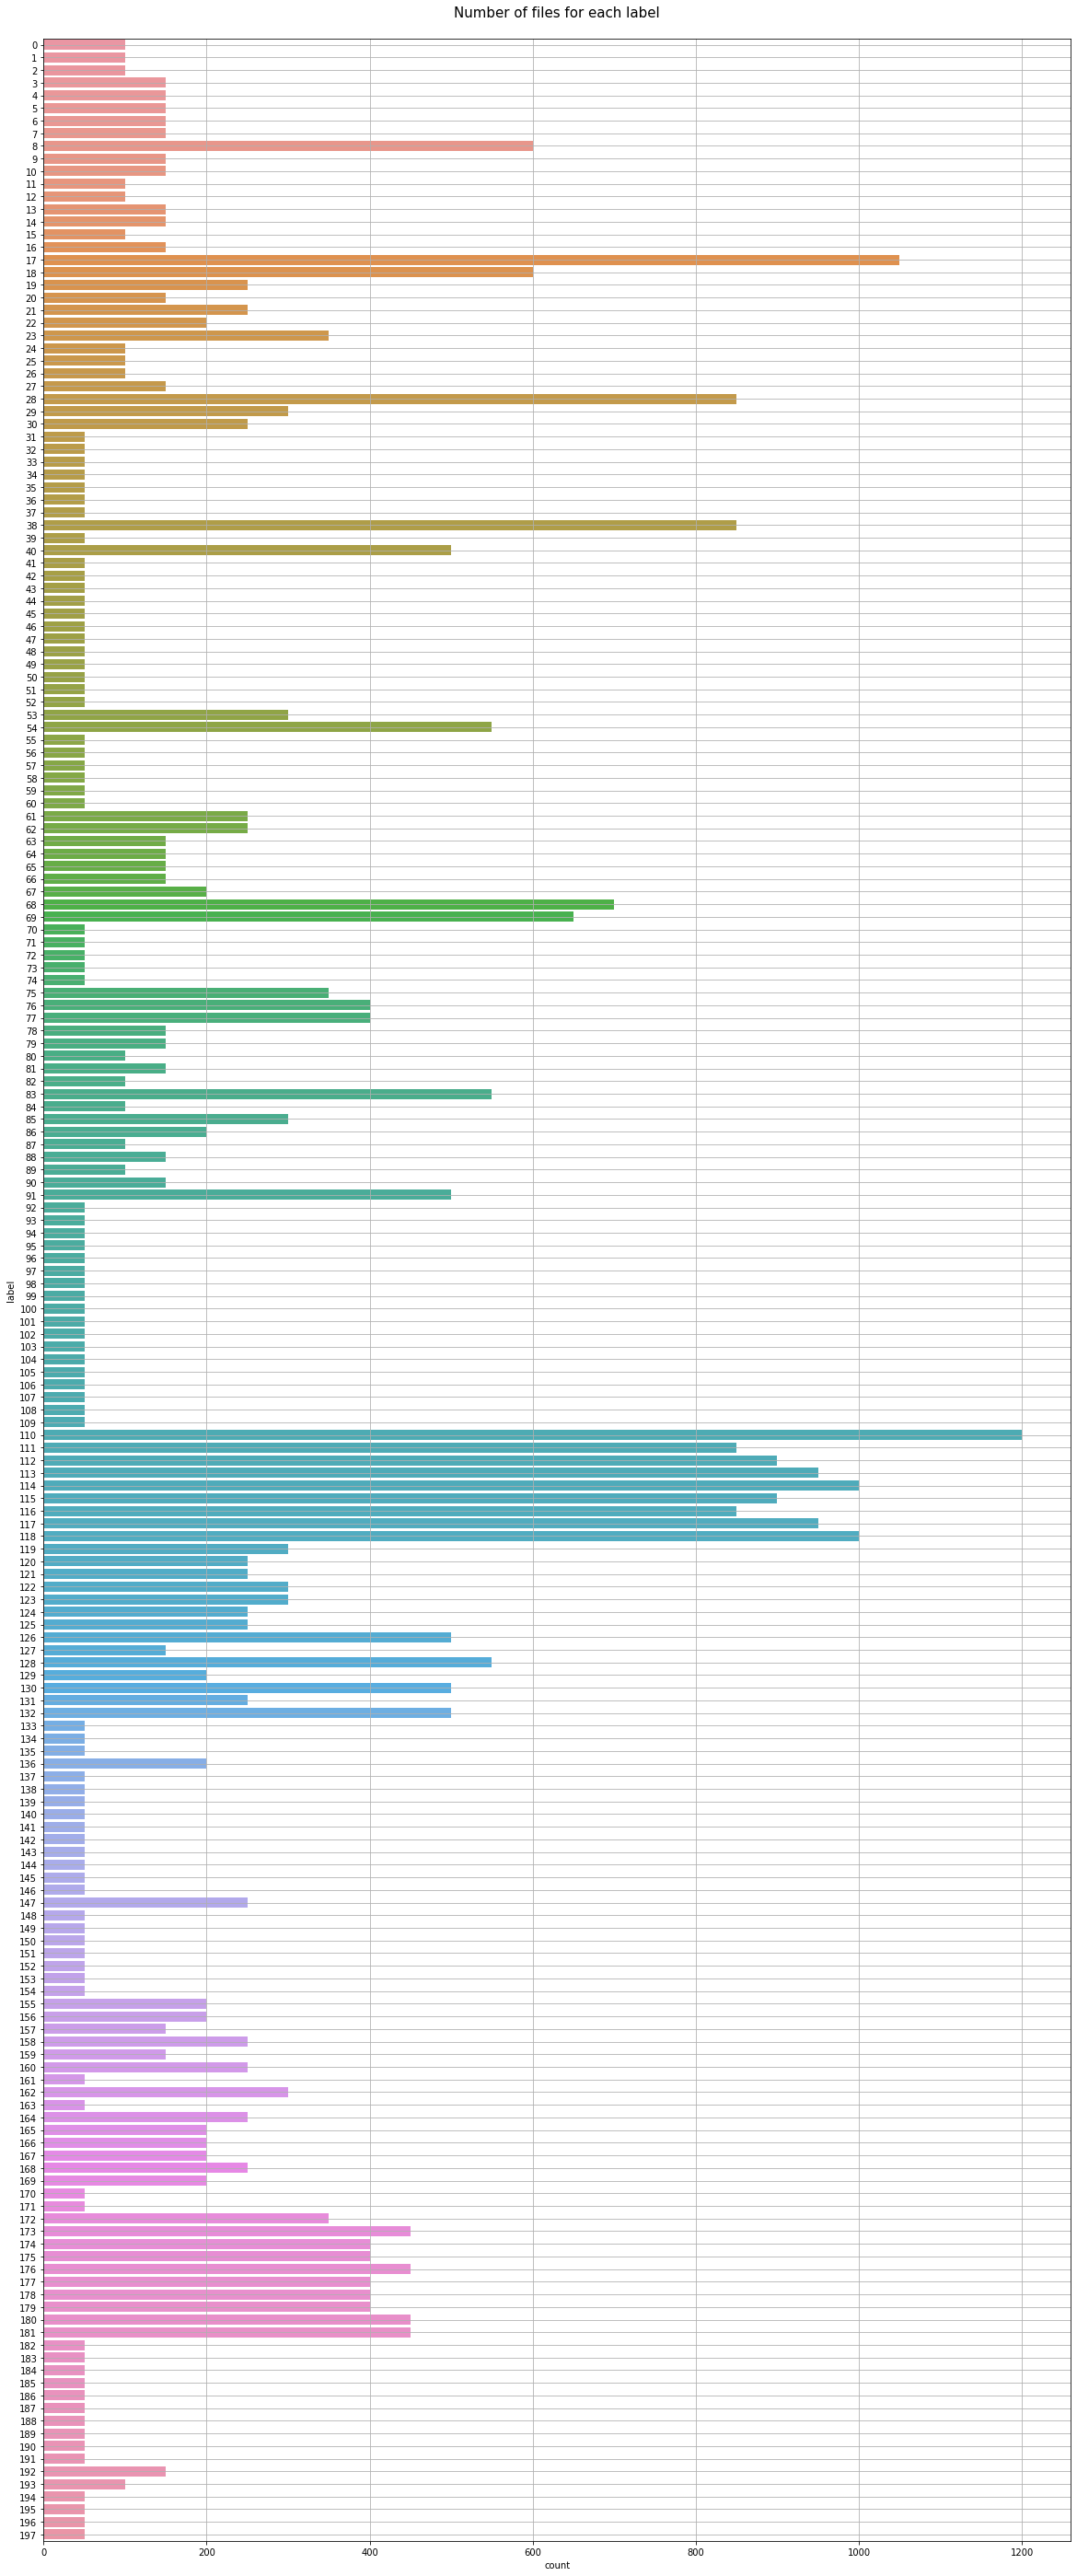

In [30]:
#라벨 별 분포도
plt.figure(figsize=(20, 50))
sns.countplot(y=y_train)

plt.title('Number of files for each label\n', size=15)
plt.grid()

plt.show()

리샘플링

In [14]:
# label 별 1개의 파일
# 해당 파일이 대푯값을 가질 수 있을지.. -> 분산분석 필요
sample_list = list(train_label.drop_duplicates().index)
train_list = [f'{i}.csv' for i in sample_list]

In [15]:
# event_time, nrows 변수 조정
# 완전히 상태 B로 변했을 때 산정, event_time = 15
# nrows의 경우 200 안쪽으로 조절해도 괜찮을듯 (test 데이터가 1분이므로)
def data_loader_all_v2(func, files, folder='', train_label=None, event_time=15, nrows=200):
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)     
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close()
        pool.join()        
    combined_df = pd.concat(df_list)    
    return combined_df

In [16]:
# train_list 반영하여 새로운 train 셋 구성
train = data_loader_all_v2(data_loader_v2, train_list, folder=train_folder, train_label=train_label)

In [17]:
# 의미없는 칼럼 drop
train = train.loc[:, train.nunique() != 1]

In [45]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

AttributeError: 'NpzFile' object has no attribute 'drop'

In [19]:
X_train.shape, y_train.shape

((36630, 3365), (36630,))

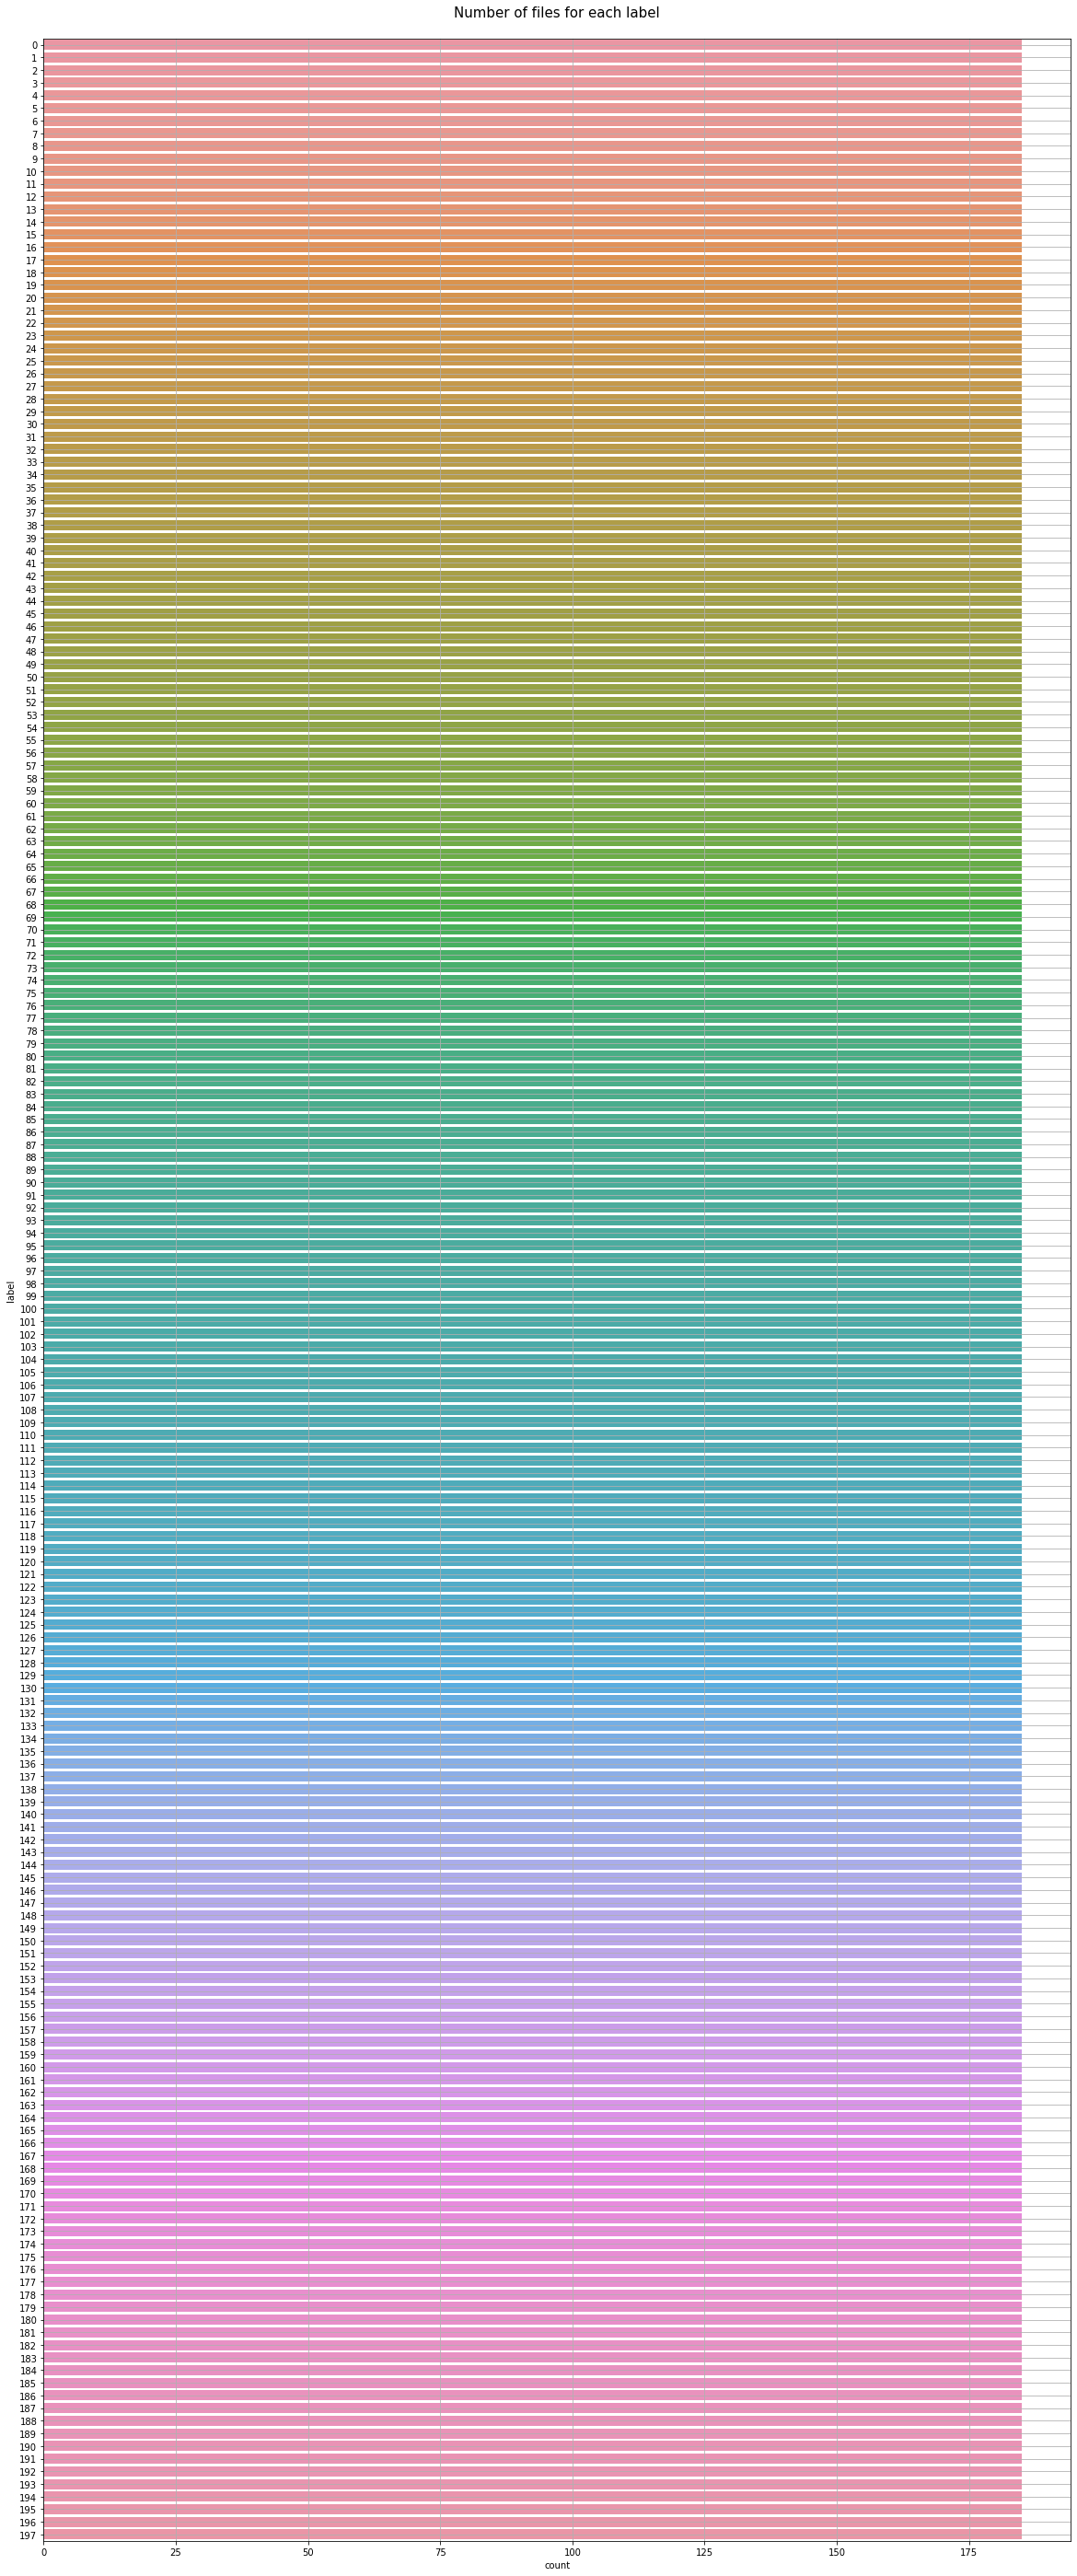

In [22]:
#라벨 별 분포도
plt.figure(figsize=(20, 50))
sns.countplot(y=y_train)

plt.title('Number of files for each label\n', size=15)
plt.grid()
plt.show()

이상치 탐색

In [24]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.005), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0,behaviour="new")
clf.fit(X_train)

pred = clf.predict(X_train)
X_train['out']=pred

NameError: name 'feature_set' is not defined

In [25]:
X_train['out']=pred

In [26]:
tmp=X_train.loc[X_train['out']==-1]
out_index=list(tmp.index)

In [27]:
# 1이면 정상, -1이면 이상치 포함된 index
print(X_train['out'].value_counts())
print(out_index)

 1    56148
-1      282
Name: out, dtype: int64
[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 286, 286, 286, 286, 286, 286, 286, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 302, 302, 302, 302, 302, 302, 

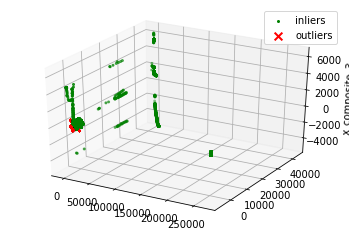

In [28]:
#시각화
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3) 
scaler = StandardScaler()

X = scaler.fit_transform(X_train)
X_reduce = pca.fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

ax.scatter(X_reduce[out_index,0],X_reduce[out_index,1], X_reduce[out_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [29]:
X_train.head

<bound method NDFrame.head of          V0000     V0001     V0002     V0003     V0004       V0005  \
0    30.469574  8.722739  8.686953  8.677701  8.696935  215.779134   
0    30.471422  8.843733  8.724614  8.736648  8.724141  189.935527   
0    30.465795  8.639923  8.693430  8.706842  8.698667  167.172015   
0    30.451257  8.643156  8.721100  8.677412  8.697360  190.645984   
0    30.469449  8.786702  8.718487  8.632532  8.686938  208.447021   
..         ...       ...       ...       ...       ...         ...   
822  30.456817  8.702454  8.701386  8.681137  8.695053  201.822110   
822  30.482012  8.767301  8.684104  8.670489  8.694716  192.855644   
822  30.457974  8.757747  8.707818  8.642492  8.719812  197.300900   
822  30.472377  8.795316  8.698144  8.692727  8.664082  162.708780   
822  30.467129  8.637727  8.671558  8.708702  8.710187  165.992188   

          V0006         V0007  V0008     V0009  ...       V5085     V5086  \
0    148.857105 -8.951266e-20    0.0 -0.000694  ... 

In [31]:
X_train = X_train.drop(out_index)

In [32]:
X_train.head

<bound method NDFrame.head of          V0000     V0001     V0002     V0003     V0004       V0005  \
0    30.469574  8.722739  8.686953  8.677701  8.696935  215.779134   
0    30.471422  8.843733  8.724614  8.736648  8.724141  189.935527   
0    30.465795  8.639923  8.693430  8.706842  8.698667  167.172015   
0    30.451257  8.643156  8.721100  8.677412  8.697360  190.645984   
0    30.469449  8.786702  8.718487  8.632532  8.686938  208.447021   
..         ...       ...       ...       ...       ...         ...   
822  30.456817  8.702454  8.701386  8.681137  8.695053  201.822110   
822  30.482012  8.767301  8.684104  8.670489  8.694716  192.855644   
822  30.457974  8.757747  8.707818  8.642492  8.719812  197.300900   
822  30.472377  8.795316  8.698144  8.692727  8.664082  162.708780   
822  30.467129  8.637727  8.671558  8.708702  8.710187  165.992188   

          V0006         V0007  V0008     V0009  ...       V5085     V5086  \
0    148.857105 -8.951266e-20    0.0 -0.000694  ... 

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0, verbose=1, n_jobs=-1,
                               n_estimators=300, min_samples_leaf=5, max_depth=20)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [ ]:
# GridSearchCV - Not run (lack of memory)

params = {'n_estimators':[100],'max_depth':[8, 12, 50],'min_samples_leaf':[8, 18, 100],'min_samples_split':[8, 20, 100]}

model = RandomForestClassifier(random_state=0, verbose=1, n_jobs=-1)
grid_cv = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('best parameter set :\n', grid_cv.best_params_)
print(f'best accuracy : {grid_cv.best_score_:.4f}')

In [24]:
#피쳐 중요도 확인
ftr_tmp = model.feature_importances_
ftr_importances = pd.Series(ftr_tmp, index=X_train.columns)

Index(['V0046', 'V0050', 'V0087', 'V0088', 'V0089', 'V0135', 'V0188', 'V0201',
       'V0215', 'V0220',
       ...
       'V4979', 'V4984', 'V4992', 'V4998', 'V5006', 'V5013', 'V5016', 'V5019',
       'V5020', 'V5115'],
      dtype='object', length=868)

In [25]:
ftr_importances[ftr_importances==0].index

Index(['V0046', 'V0050', 'V0087', 'V0088', 'V0089', 'V0135', 'V0188', 'V0201',
       'V0215', 'V0220',
       ...
       'V4979', 'V4984', 'V4992', 'V4998', 'V5006', 'V5013', 'V5016', 'V5019',
       'V5020', 'V5115'],
      dtype='object', length=868)

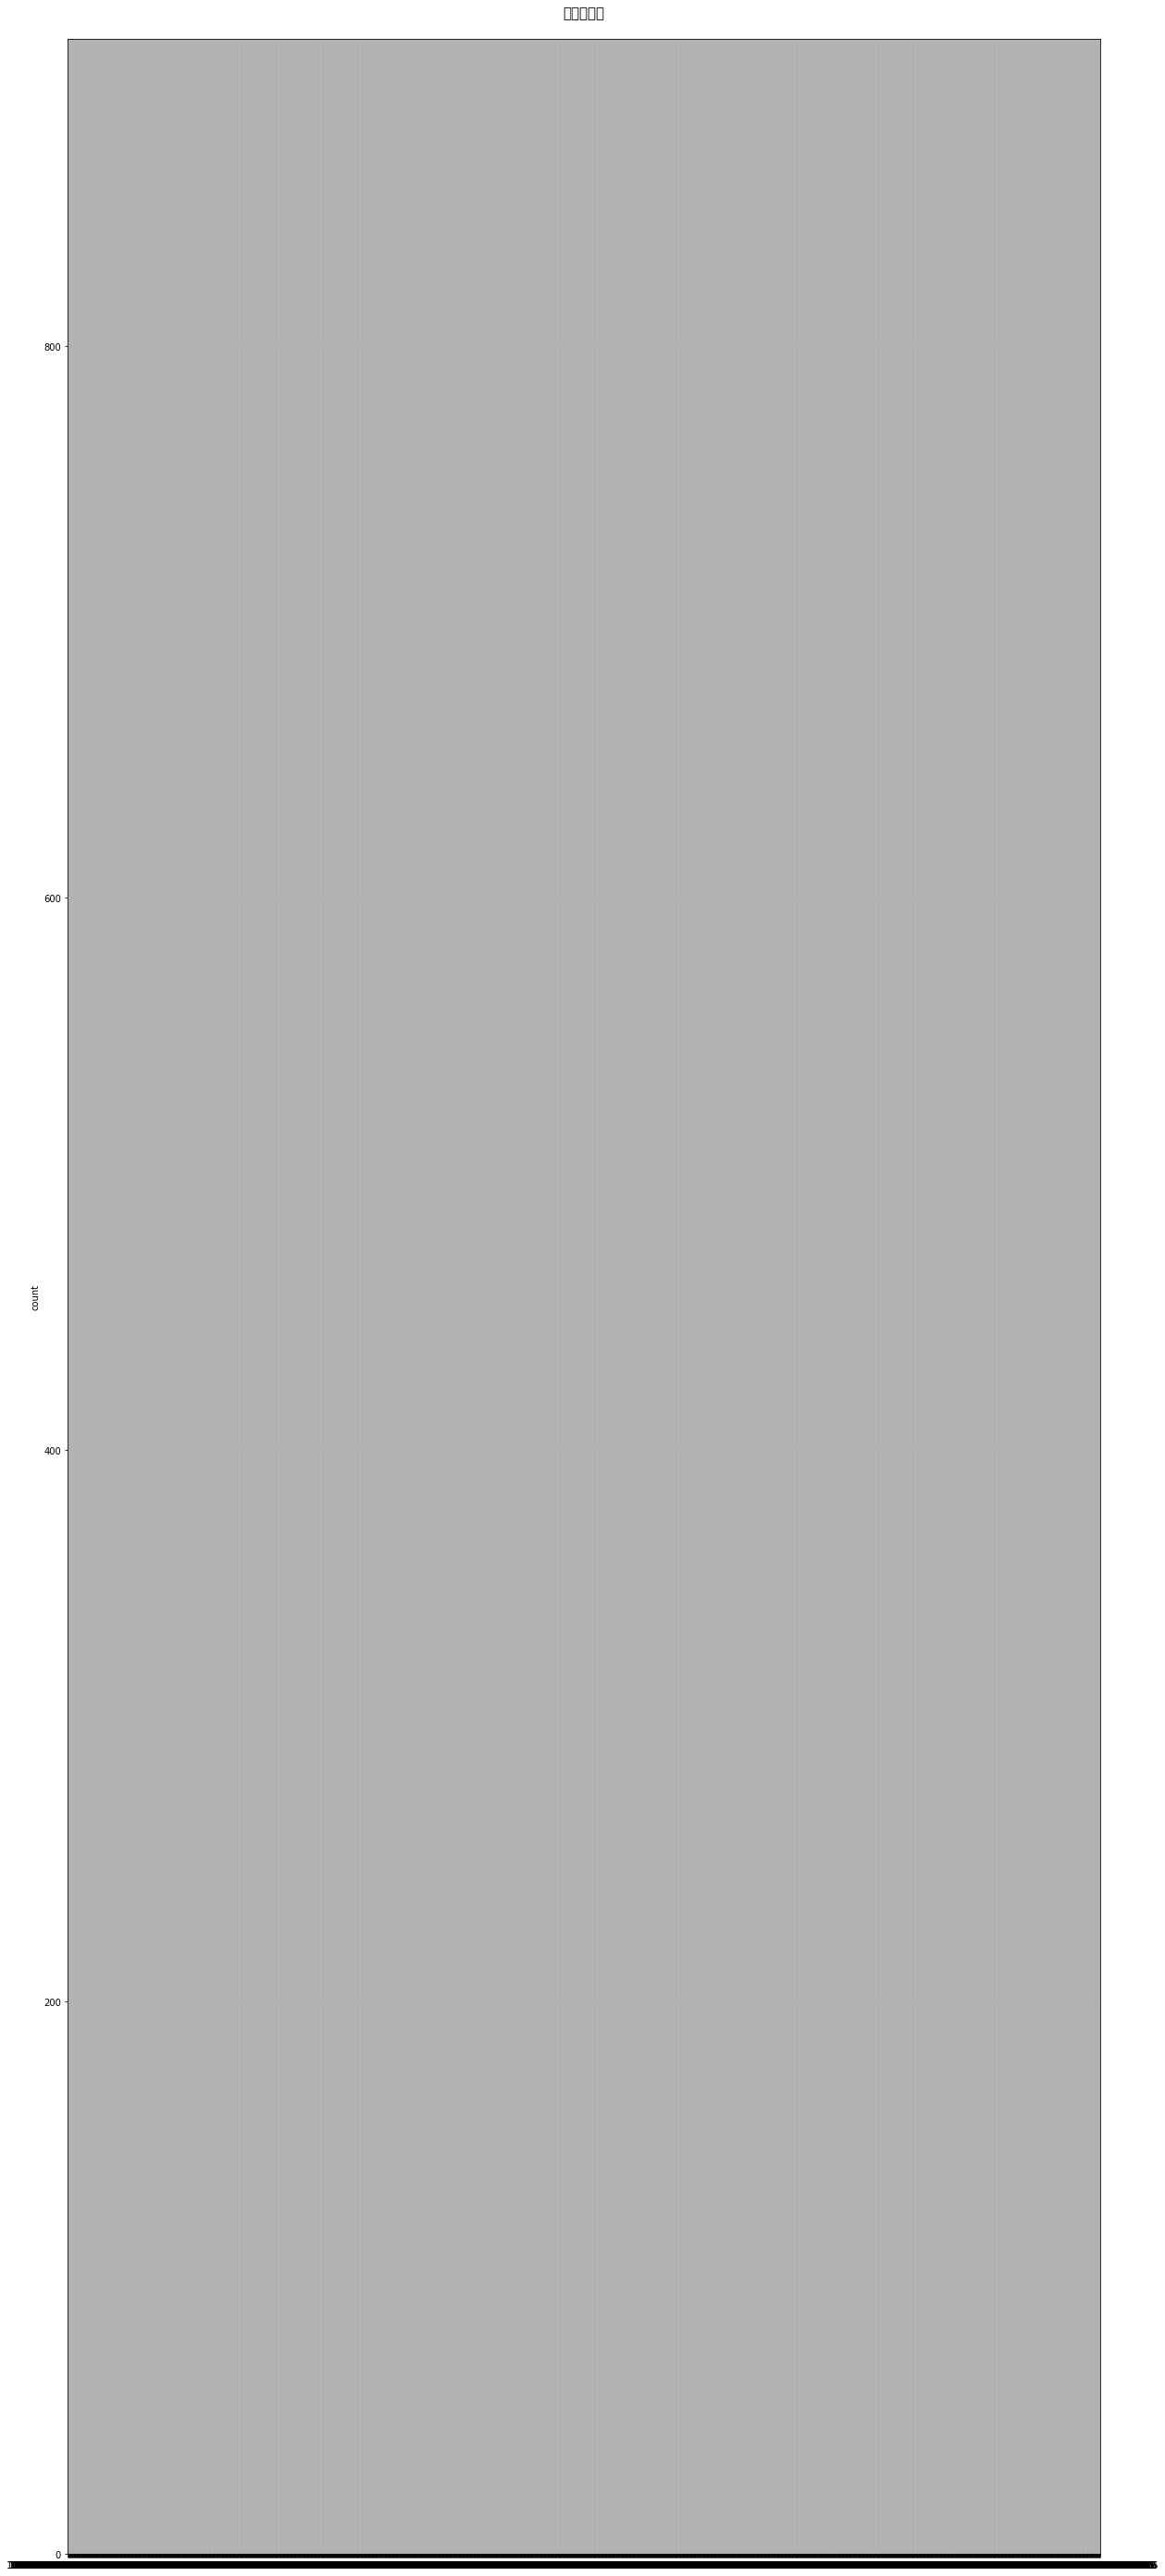

In [30]:
#라벨 별 분포도
plt.figure(figsize=(20, 50))
sns.countplot(x=ftr_importances)

plt.title('피처중요도\n', size=15)
plt.grid()
plt.show()

저장

In [41]:
train = np.load('train.npz')

In [42]:
X = train['X']
y = train['y']

In [43]:
X.shape

(36630, 3365)

In [44]:
#중요도 낮은 피처 제거
X_train_new = X.loc[:, ftr_importances[ftr_importances>=5].index]  

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [40]:
X_train_new.shape

(36630, 0)

In [33]:
np.savez('train.npz', X=X_train, y=y_train)

In [ ]:
X_train_new['label'] = y_train

In [ ]:
X_train_new.to_csv('X_train_new.csv')